In [2]:
# Feature Engineering using the Titanic dataset
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('d:/Machine Learning/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'Quantifying missing data')

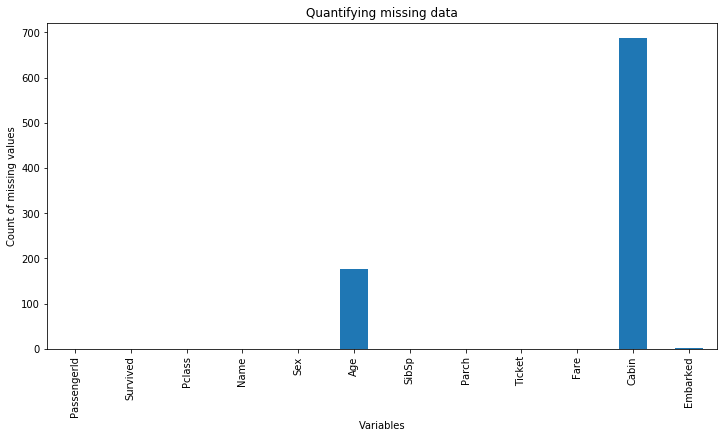

In [4]:
data.isnull().sum().plot.bar(figsize=(12,6))
plt.ylabel('Count of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [6]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

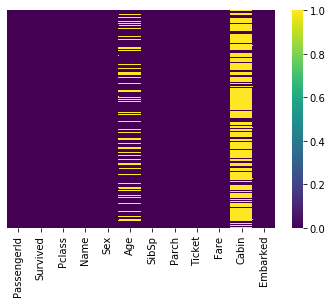

In [8]:
import seaborn as sns
# Use heatmap to determine if there are missing data
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

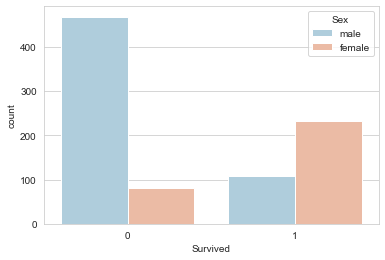

In [10]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=data, palette='RdBu_r')

Text(0.5, 1.0, 'Cardinality')

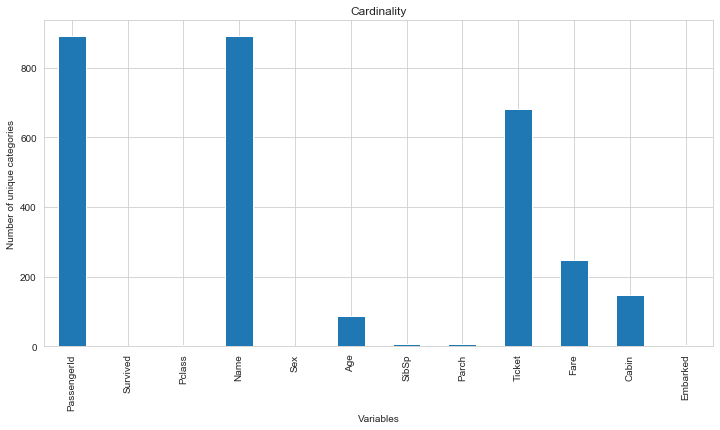

In [11]:
# Plot with cardinality of each variable
data.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')


In [12]:
# Feature engineering with the Boston dataset
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
 columns=boston_dataset.feature_names)

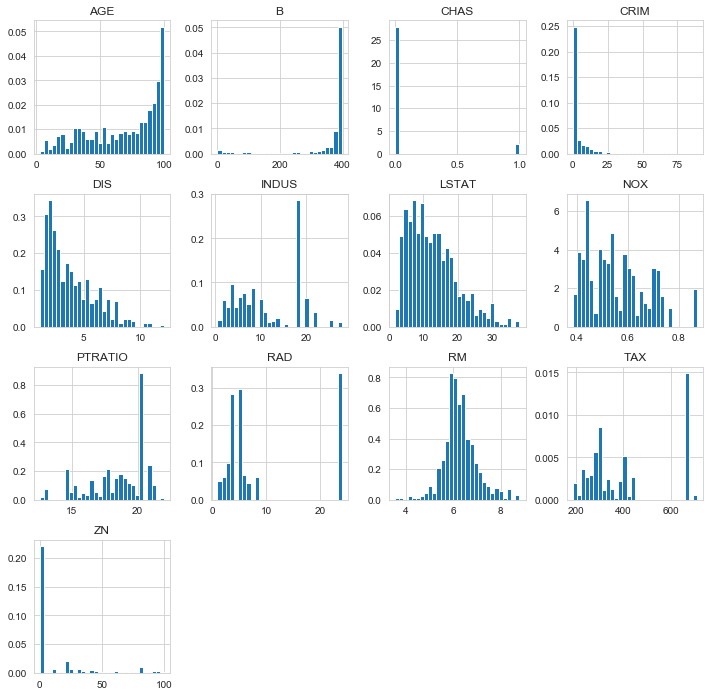

In [13]:
# Visualize the variable distribution with histograms: 
boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

In [14]:
# Highlighting outliers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

Text(0.5, 1.0, 'Boxplot')

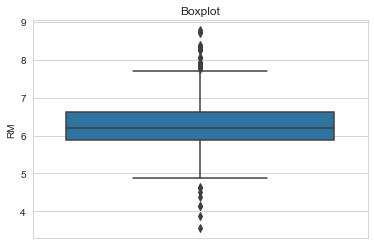

In [15]:
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

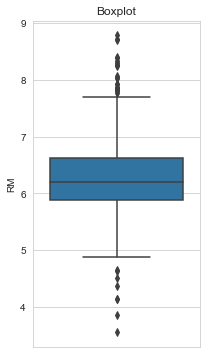

In [16]:
# We can change the final size of the plot using the figure() method from
#Matplotlib. We need to call this command before making the plot with
#seaborn:
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

In [17]:
# To find the outliers in a variable, we need to find the distribution boundaries
# according to the IQR proximity rule: Upper boundary = 75th quantile + (IQR * 1.5)
# Lower boundary = 25th quantile - (IQR * 1.5)
# IQR = 75th quantile - 25th quantile
# Typically, we calculate the IQR proximity rule boundaries by multiplying
# the IQR by 1.5. However, it is also common practice to find extreme
# values by multiplying the IQR by 3.

def find_boundaries(df, variable, distance):
 IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
 lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
 upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
 return upper_boundary, lower_boundary

In [18]:
# Calculate and then display the IQR proximity rule boundaries for the RM variable:
upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730499999999999, 4.778500000000001)

In [20]:
# If you want to find very extreme values, you can use 3 as the distance of
# find_boundaries() instead of 1.5.
find_boundaries(boston, 'RM', 1.5)

(7.730499999999999, 4.778500000000001)

In [21]:
# Create a boolean vector to flag observations outside the boundaries 
outliers = np.where(boston['RM'] > upper_boundary, True,
 np.where(boston['RM'] < lower_boundary, True, False))

In [22]:
# Create a new dataframe with the outlier values and then display the top five
# rows:
outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

In [23]:
# To remove the outliers from the dataset, execute 
boston.loc[~outliers, 'RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 476, dtype: float64

In [24]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
# Range 
boston.max() - boston.min()


RM        5.21900
LSTAT    36.24000
CRIM     88.96988
dtype: float64

Text(0.5, 0, 'Number of rooms')

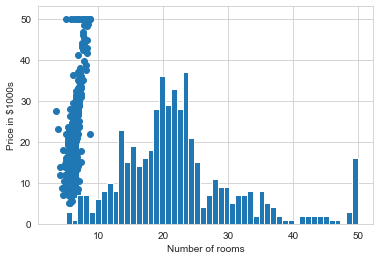

In [55]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
# Imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.datasets import load_boston
# Load the housing dataset
boston = load_boston()
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target,bins=50)

# Labels
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

#Let’s see a scatter plot of one feature, versus the target. In this case, we will use 
#the housing price versus the number of rooms in the dwelling.
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5],boston.target)

# Label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

In [57]:
# Reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# Label columns
boston_df.columns = boston.feature_names
# Show first five rows
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [78]:
boston_df.shape

(506, 14)

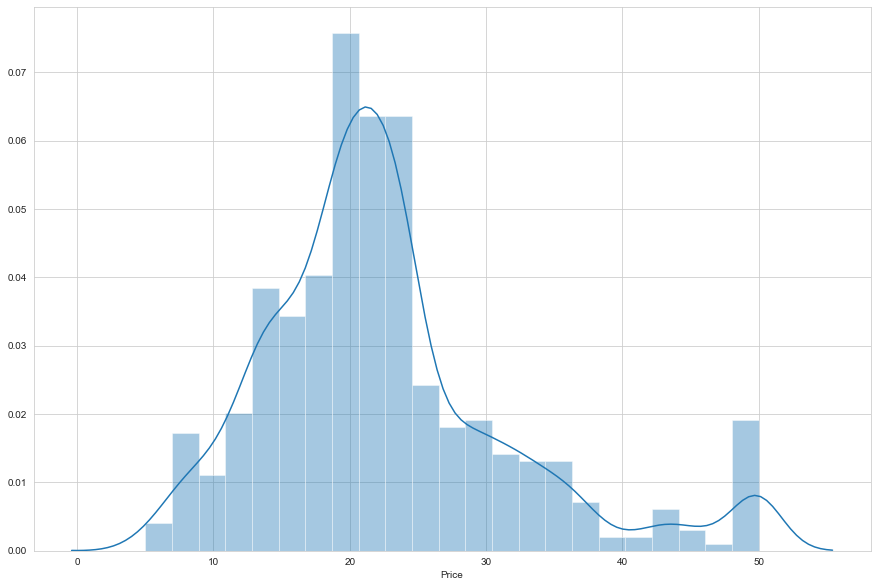

In [80]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(boston_df['Price'])

In [26]:
# Calculate std for RM
print("Standard deviation for RM.",np.std(boston_df['AGE']))

Standard deviation for RM. 28.121032570236885


In [27]:
print("25th percentile: ",np.percentile(boston_df['AGE'], 25))

25th percentile:  45.025


In [28]:
print("75th percentile: ",np.percentile(boston_df['AGE'], 75))

75th percentile:  94.07499999999999


In [29]:
print("Median: ",np.percentile(boston_df['AGE'], 50))

Median:  77.5


In [19]:
# Compute the percentage of missing values
boston_df.isnull().mean().sort_values(ascending=True)

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
dtype: float64

In [33]:
boston_df.dropna()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [61]:
# Reset data as pandas DataFrame
boston_df = DataFrame(boston.data)

# Label columns
boston_df.columns = boston.feature_names
# Set price column for target
boston_df['Price'] = boston.target

Text(0.5, 1.0, 'Boxplot of AGE')

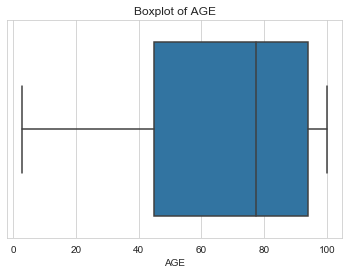

In [62]:
sns.boxplot(boston_df['AGE'])
plt.title('Boxplot of AGE')

In [89]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression
# Create a LinearRegression Object
lreg = LinearRegression()
# Data Columns
X_multi = boston_df.drop('Price',1)
# Targets
Y_target = boston_df.Price

# Implement Linear Regression
lreg.fit(X_multi,Y_target)

print('The estimated intercept coefficient is %.2f ' %lreg.intercept_)

The estimated intercept coefficient is 36.46 


In [90]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)
# Set a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear   regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show the coefficients
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [106]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

In [107]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [108]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Text(0.5, 1.0, 'Residual Plots')

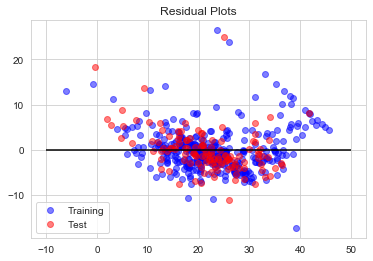

In [96]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_squared_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Mean Absolute Error: 8.881104239537276
Mean Squared Error: 127.46195454253244
Root Mean Squared Error: 11.289904983769015


In [117]:
import statsmodels.api as sm # import statsmodels 

X = boston_df["RM"] ## X usually means our input variables (or independent variables)
y = boston_df["Price"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\tonyd\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           2.49e-74
Time:                        20:31:30   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""